# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Diccionario de datos 

Tabla users (datos sobre los usuarios)
- user_id: identificador único del usuario.
- first_name: nombre del usuario.
- last_name: apellido del usuario.
- age: edad del usuario (en años).
- reg_date: fecha de suscripción (dd, mm, aa).
- churn_date: la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos).
- city: ciudad de residencia del usuario.
- plan: nombre de la tarifa.

Tabla calls (datos sobre las llamadas)
- id: identificador único de la llamada.
- call_date: fecha de la llamada.
- duration: duración de la llamada (en minutos).
- user_id: el identificador del usuario que realiza la llamada.

Tabla messages (datos sobre los SMS)
- id: identificador único del SMS.
- message_date: fecha del SMS.
- user_id: el identificador del usuario que manda el SMS.

Tabla internet (datos sobre las sesiones web)
- id: identificador único de la sesión.
- mb_used: el volumen de datos gastados durante la sesión (en megabytes).
- session_date: fecha de la sesión web.
- user_id: identificador del usuario.

Tabla plans (datos sobre las tarifas)
- plan_name: nombre de la tarifa.
- usd_monthly_fee: pago mensual en dólares estadounidenses.
- minutes_included: minutos incluidos al mes.
- messages_included: SMS incluidos al mes.
- mb_per_month_included: datos incluidos al mes (en megabytes).
- usd_per_minute: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).
- usd_per_message: precio por SMS tras exceder los límites del paquete.
- usd_per_gb: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('./datasets/megaline_users.csv')
df_calls = pd.read_csv('./datasets/megaline_calls.csv')
df_messages = pd.read_csv('./datasets/megaline_messages.csv')
df_internet = pd.read_csv('./datasets/megaline_internet.csv')
df_plans = pd.read_csv('./datasets/megaline_plans.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()
print(df_plans.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15

In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
# Cambiar el nombre usd_monthly_pay por usd_monthly_fee
new_name_column = {'usd_monthly_pay' : 'usd_monthly_fee'}
df_plans = df_plans.rename(columns=new_name_column)
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Enriquecer los datos

In [6]:
# Cambiar el nombre de la columna plan_name para mantener la uniformidad
df_plans.rename(columns={'plan_name': 'plan'}, inplace=True)
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute      plan  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [7]:
# convertir los mb incluidos a gb
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute      plan  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


En el DataFrame df_plans se corrigio el nombre de la columna 'usd_monthly_pay' por 'usd_monthly_fee' para coincidir con la información mostrada en el diccionario de datos, asimismo la columna 'plan_name' fue renombrada por 'plan' esto para facilitar una posible union con la tabla users. Por ultimo se agrego una nueva columna donde se transforman los mb utilizados a gb, dado que el cliente utiliza esta medida. 

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()
print(df_users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


En este df_users se puede observar que la columna churn_date es tiene tipos de datos object, cuando lo ideal es que sean del tipo datetime, asimismo en esta misma columna existen muchos valores ausentes, por lo cual es necesario rellenarlos.

In [9]:
# Imprime una muestra de datos para usuarios
print(df_users.head(10))
# verificar cuantos valores ausentes hay
print('Valores ausentes: ', df_users.isna().sum())
# verificar si hay valores duplicados
print('Valores duplicados: ', df_users.duplicated().sum())

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         

Existen 466 valores ausentes dentro del df_users por lo cual es necesario investigar como afectaria si se eliminan estos valores ausentes, por otra parte podrían ser reemplazados por los valores de la columna 'plan' esto de acuerdo al diccionario de datos donde indica que las fechas ausentes se deben a que el el tipo de tarifa estaba activa.

### Corregir los datos

In [10]:
# rellenar los valores ausentes con el tipo de tarifa que usan, implementanto el metodo apply y lambda para que revise
# fila por fila 

df_users['churn_date'] = df_users.apply(
    lambda row: row['plan']
    if pd.isna(row['churn_date'])
    else row['churn_date'],
    axis= 1)
print(df_users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate    ultimate  
1  2018-08-13      surf        s

In [11]:
# cambiar el tipo de datos de la columna reg_date a datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
print(df_users)

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city   reg_date      plan churn_date  
0        Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   ultimate  
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf       surf  
2         Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf       surf  
3                                Tulsa, OK MSA 2018-01-28      surf       surf  
4              Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      sur

### Enriquecer los datos

In [12]:
# crear una columna donde solo llamamos a los meses
df_users['month'] = df_users['reg_date'].dt.month
print(df_users)

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city   reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf   
3                                Tulsa, OK MSA 2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      surf   
..                                         ..

En el df_users primeramente se rellenaron los valores ausentes con la informacion de la columna plan, debido a que en el diccionario de datos nos indica que las filas que tienen fecha es porque en ese momento terminaron el contrato con el cliente, y los que no tienen esa información es porque sigue vigente su plan. Después se cambio el tipo de datos de la columna 'reg_date' a datetime para que de esta manera se pudieran extraer los meses(month) y de esta manera facilitar el análisis mas adelante. 

## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()
print(df_calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


In [14]:
# Imprime una muestra de datos para las llamadas
print(df_calls.head(10))
# verificar si hay valores duplicados
print('Valores duplicados: ', df_calls.duplicated().sum())
# verificar si hay valores ausentes
print('Valores ausentes: ', df_calls.isna().sum())
duplicados_id = df_calls['id'].duplicated().sum()
print('Valores duplicados en id ', duplicados_id)

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40
Valores duplicados:  0
Valores ausentes:  id           0
user_id      0
call_date    0
duration     0
dtype: int64
Valores duplicados en id  0


### Corregir los datos

In [15]:
# Crear una columna donde se registre el tiempo de duracion redondeado hacia arriba
df_calls['duration_round'] = np.ceil(df_calls['duration'])
print(df_calls)

              id  user_id   call_date  duration  duration_round
0        1000_93     1000  2018-12-27      8.52             9.0
1       1000_145     1000  2018-12-27     13.66            14.0
2       1000_247     1000  2018-12-27     14.48            15.0
3       1000_309     1000  2018-12-28      5.76             6.0
4       1000_380     1000  2018-12-30      4.22             5.0
...          ...      ...         ...       ...             ...
137730  1499_199     1499  2018-11-21      8.72             9.0
137731  1499_200     1499  2018-10-20     10.89            11.0
137732  1499_201     1499  2018-09-21      8.12             9.0
137733  1499_202     1499  2018-10-10      0.37             1.0
137734  1499_203     1499  2018-12-29     13.86            14.0

[137735 rows x 5 columns]


In [16]:
# Cambiar el tipo de datos de la columna call_date a datetime 
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
print(df_calls)

              id  user_id  call_date  duration  duration_round
0        1000_93     1000 2018-12-27      8.52             9.0
1       1000_145     1000 2018-12-27     13.66            14.0
2       1000_247     1000 2018-12-27     14.48            15.0
3       1000_309     1000 2018-12-28      5.76             6.0
4       1000_380     1000 2018-12-30      4.22             5.0
...          ...      ...        ...       ...             ...
137730  1499_199     1499 2018-11-21      8.72             9.0
137731  1499_200     1499 2018-10-20     10.89            11.0
137732  1499_201     1499 2018-09-21      8.12             9.0
137733  1499_202     1499 2018-10-10      0.37             1.0
137734  1499_203     1499 2018-12-29     13.86            14.0

[137735 rows x 5 columns]


### Enriquecer los datos

In [17]:
# crear una nueva columna donde solo se llamen a los meses 
df_calls['month'] = df_calls['call_date'].dt.month
print(df_calls)

              id  user_id  call_date  duration  duration_round  month
0        1000_93     1000 2018-12-27      8.52             9.0     12
1       1000_145     1000 2018-12-27     13.66            14.0     12
2       1000_247     1000 2018-12-27     14.48            15.0     12
3       1000_309     1000 2018-12-28      5.76             6.0     12
4       1000_380     1000 2018-12-30      4.22             5.0     12
...          ...      ...        ...       ...             ...    ...
137730  1499_199     1499 2018-11-21      8.72             9.0     11
137731  1499_200     1499 2018-10-20     10.89            11.0     10
137732  1499_201     1499 2018-09-21      8.12             9.0      9
137733  1499_202     1499 2018-10-10      0.37             1.0     10
137734  1499_203     1499 2018-12-29     13.86            14.0     12

[137735 rows x 6 columns]


In [18]:
# filtro para identificar llamadas con 0 min
llamadas_cero = df_calls[df_calls['duration'] == 0]
# cuantas llamadas en 0 hay
total_calls_cero = len(llamadas_cero)
print('El total de llamadas en cero es:', total_calls_cero)

# eliminar las llamadas en 0 ya que no son relevantes para el análisis que se esta realizando 
df_calls = df_calls[df_calls['duration'] != 0]
df_calls

El total de llamadas en cero es: 26834


,id,user_id,call_date,duration,duration_round,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0,11
137731,1499_200,1499,2018-10-20,10.89,11.0,10
137732,1499_201,1499,2018-09-21,8.12,9.0,9
137733,1499_202,1499,2018-10-10,0.37,1.0,10


En el df_calls se hicieron varias modificaciones, primeramente se investigo que no existieran valores duplicados y ausentes, si bien al observar la columna user_id se podria pensar que hay valores duplicados al observar la columna call_date se puede concluir que las llamadas pertenecientes a ese usuario fueron hechas en diferentes fechas y con diferentes id de llamadas, para verificar que los id's no estuvieran duplicados se analizo la columna y el resultado fue que no exiten valores duplicados. Después el cliente solicita que todas aquellas llamadas realizadas deben estar redondeadas al siguiente numero, incluso si la llamada duro 1 segundo. Despues los datos de la columna call_date fueron convertidos a datetime y se extrajo una columna con los meses(month) la cual ayudara al análisis que se realizara posteriormente. Finalmente se encontraron 26834 llamadas en 0, las cuales fueron eliminadas ya que en este analisis no son relevantes. 

## Mensajes

In [19]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()
print(df_messages.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [20]:
# Imprime una muestra de datos para los mensajes
print(df_messages.head(20))
# Verificar si hay valores duplicados
print('Valores duplicados: ', df_messages.duplicated().sum())
# Verificar si hay valores ausentes 
print('Valores ausentes: ', df_messages.isna().sum())

          id  user_id message_date
0   1000_125     1000   2018-12-27
1   1000_160     1000   2018-12-31
2   1000_223     1000   2018-12-31
3   1000_251     1000   2018-12-27
4   1000_255     1000   2018-12-26
5   1000_346     1000   2018-12-29
6   1000_386     1000   2018-12-30
7   1000_413     1000   2018-12-31
8   1000_502     1000   2018-12-27
9   1000_525     1000   2018-12-28
10  1000_567     1000   2018-12-25
11    1001_1     1001   2018-11-14
12    1001_2     1001   2018-08-17
13    1001_5     1001   2018-12-05
14    1001_7     1001   2018-11-28
15    1001_9     1001   2018-10-23
16   1001_10     1001   2018-09-01
17   1001_11     1001   2018-11-18
18   1001_17     1001   2018-12-11
19   1001_18     1001   2018-10-01
Valores duplicados:  0
Valores ausentes:  id              0
user_id         0
message_date    0
dtype: int64


En este apartado de messages el unico error que alcanzo a percibir es el de el tipo de dato de la columna message_date, el cual sera convertido a datetime. En cuanto a valores ausentes y duplicados, no se encontraron.

### Corregir los datos

In [21]:
# cambiar el tipo de datos de la columna message_date a datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
print(df_messages)

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]


### Enriquecer los datos

In [22]:
# crear una columna nueva donde se extraigan los meses
df_messages['month'] = df_messages['message_date'].dt.month
print(df_messages)

             id  user_id message_date  month
0      1000_125     1000   2018-12-27     12
1      1000_160     1000   2018-12-31     12
2      1000_223     1000   2018-12-31     12
3      1000_251     1000   2018-12-27     12
4      1000_255     1000   2018-12-26     12
...         ...      ...          ...    ...
76046  1497_526     1497   2018-12-24     12
76047  1497_536     1497   2018-12-24     12
76048  1497_547     1497   2018-12-31     12
76049  1497_558     1497   2018-12-24     12
76050  1497_613     1497   2018-12-23     12

[76051 rows x 4 columns]


En este DF no se encontraron valores ausentes ni duplicados, el cambio que se realizo fue principalmente en los datos de la columna message_date los cuales fueron cambiados a datetime. Por último se extrajeron los meses(month) para un futuro análisis. 

## Internet

In [23]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()
print(df_internet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [24]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.head(10))
# Verificar valores duplicados
print('Valores duplicados: ', df_internet.duplicated().sum())
# verificar valores ausentes
print('Valores ausentes: ', df_internet.isna().sum())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92
Valores duplicados:  0
Valores ausentes:  id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


Al observar la informacion del DataSet no se perciben valores ausentes ni duplicados, aunque si hay valores en la columna mb_used los cuales estan en 0, se analizara si es pertinente borrarlos.

### Corregir los datos

In [25]:
# Cambiar el tipo de datos de session_date a datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
print(df_internet)

              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]


### Enriquecer los datos

In [26]:
# Crear una columna nueva donde se muestre solo la informacion de los meses 
df_internet['month'] = df_internet['session_date'].dt.month
print(df_internet.head())

         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29    89.86     12
1  1000_204     1000   2018-12-31     0.00     12
2  1000_379     1000   2018-12-28   660.40     12
3  1000_413     1000   2018-12-26   270.99     12
4  1000_442     1000   2018-12-27   880.22     12


In [27]:
# filtro para detectar valores en 0 de la columna mb_used
mb_cero = df_internet[df_internet['mb_used'] == 0]
total_mb_cero = len(mb_cero)
print('El total de mb en cero es: ', total_mb_cero)

El total de mb en cero es:  13747


In [28]:
## eliminar los valores en cero del DF
df_internet = df_internet[df_internet['mb_used'] !=0]
print(df_internet)

              id  user_id session_date  mb_used  month
0        1000_13     1000   2018-12-29    89.86     12
2       1000_379     1000   2018-12-28   660.40     12
3       1000_413     1000   2018-12-26   270.99     12
4       1000_442     1000   2018-12-27   880.22     12
5         1001_0     1001   2018-08-24   284.68      8
...          ...      ...          ...      ...    ...
104819  1499_214     1499   2018-10-18   261.13     10
104820  1499_215     1499   2018-10-20   218.06     10
104821  1499_216     1499   2018-12-30   304.72     12
104822  1499_217     1499   2018-09-22   292.75      9
104824  1499_219     1499   2018-12-24   758.31     12

[91078 rows x 5 columns]


Primeramente se cambio el tipo de datos de la columna session_date a datetime, posteriormente se agrego ujna columna que contiene unicamente los meses de este DF con la finalidad de hacer un análisis mas detallado. Además se encontraron valores de la columna mb_used en 0 por lo cual se tomo la decision de eliminarlos del DataSet, ya que no son relevantes para este analisis. 

## Estudiar las condiciones de las tarifas

In [29]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.info()
df_plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_fee        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan                   2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

In [30]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_por_mes = df_calls.groupby(['user_id', 'month']).size().reset_index(name='llamadas_hechas')
print(llamadas_por_mes)

      user_id  month  llamadas_hechas
0        1000     12               16
1        1001      8               22
2        1001      9               38
3        1001     10               47
4        1001     11               49
...       ...    ...              ...
2251     1498     12               32
2252     1499      9               35
2253     1499     10               41
2254     1499     11               39
2255     1499     12               56

[2256 rows x 3 columns]


In [31]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutos_usados = df_calls.groupby(['user_id', 'month'])['duration_round'].sum().reset_index(name='minutos_usados')
print(minutos_usados)


      user_id  month  minutos_usados
0        1000     12           124.0
1        1001      8           182.0
2        1001      9           315.0
3        1001     10           393.0
4        1001     11           426.0
...       ...    ...             ...
2251     1498     12           339.0
2252     1499      9           346.0
2253     1499     10           385.0
2254     1499     11           308.0
2255     1499     12           496.0

[2256 rows x 3 columns]


In [32]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_al_mes = df_messages.groupby(['user_id', 'month']).size().reset_index(name='mensajes_enviados')
print(mensajes_al_mes)

      user_id  month  mensajes_enviados
0        1000     12                 11
1        1001      8                 30
2        1001      9                 44
3        1001     10                 53
4        1001     11                 36
...       ...    ...                ...
1801     1496      9                 21
1802     1496     10                 18
1803     1496     11                 13
1804     1496     12                 11
1805     1497     12                 50

[1806 rows x 3 columns]


In [33]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#Agrupar por user_id y month y calcular el volumen de gb usados
trafico_internet = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='mb_usados')

# convertir el trafico de MB a GB 
trafico_internet['gb_usados'] = trafico_internet['mb_usados'] / 1024

# redondear hacia arriba los GB durante el mes 
trafico_internet['gb_usados_round'] = np.ceil(trafico_internet['gb_usados'])
trafico_internet

,user_id,month,mb_usados,gb_usados,gb_usados_round
0,1000,12,1901.47,1.856904,2.0
1,1001,8,6919.15,6.756982,7.0
2,1001,9,13314.82,13.002754,14.0
3,1001,10,22330.49,21.807119,22.0
4,1001,11,18504.30,18.070605,19.0
...,...,...,...,...,...
2272,1498,12,23137.69,22.595400,23.0
2273,1499,9,12984.76,12.680430,13.0
2274,1499,10,19492.43,19.035576,20.0
2275,1499,11,16813.83,16.419756,17.0


In [34]:
# Fusionar los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_combinados = pd.merge(llamadas_por_mes, minutos_usados, on=['user_id', 'month'], how='outer')
df_combinados = pd.merge(df_combinados, mensajes_al_mes, on=['user_id', 'month'], how='outer')
df_combinados = pd.merge(df_combinados, trafico_internet, on=['user_id', 'month'], how='outer')

print(df_combinados)

      user_id  month  llamadas_hechas  minutos_usados  mensajes_enviados  \
0        1000     12             16.0           124.0               11.0   
1        1001      8             22.0           182.0               30.0   
2        1001      9             38.0           315.0               44.0   
3        1001     10             47.0           393.0               53.0   
4        1001     11             49.0           426.0               36.0   
...       ...    ...              ...             ...                ...   
2288     1407     11              NaN             NaN                1.0   
2289     1482     10              NaN             NaN                2.0   
2290     1094     10              NaN             NaN                NaN   
2291     1108     12              NaN             NaN                NaN   
2292     1311      6              NaN             NaN                NaN   

      mb_usados  gb_usados  gb_usados_round  
0       1901.47   1.856904              2

In [35]:
# rellenar valores NaN 
df_combinados = df_combinados.fillna(0)
print(df_combinados)

      user_id  month  llamadas_hechas  minutos_usados  mensajes_enviados  \
0        1000     12             16.0           124.0               11.0   
1        1001      8             22.0           182.0               30.0   
2        1001      9             38.0           315.0               44.0   
3        1001     10             47.0           393.0               53.0   
4        1001     11             49.0           426.0               36.0   
...       ...    ...              ...             ...                ...   
2288     1407     11              0.0             0.0                1.0   
2289     1482     10              0.0             0.0                2.0   
2290     1094     10              0.0             0.0                0.0   
2291     1108     12              0.0             0.0                0.0   
2292     1311      6              0.0             0.0                0.0   

      mb_usados  gb_usados  gb_usados_round  
0       1901.47   1.856904              2

In [36]:
# Añade la información de la tarifa
df_tarifas = pd.merge(df_users, df_plans, on='plan')

# combinar con el anterior DF 
df_final = pd.merge(df_combinados, df_tarifas, on='user_id', how='left', suffixes=['', '_2'])
print(df_final)

      user_id  month  llamadas_hechas  minutos_usados  mensajes_enviados  \
0        1000     12             16.0           124.0               11.0   
1        1001      8             22.0           182.0               30.0   
2        1001      9             38.0           315.0               44.0   
3        1001     10             47.0           393.0               53.0   
4        1001     11             49.0           426.0               36.0   
...       ...    ...              ...             ...                ...   
2288     1407     11              0.0             0.0                1.0   
2289     1482     10              0.0             0.0                2.0   
2290     1094     10              0.0             0.0                0.0   
2291     1108     12              0.0             0.0                0.0   
2292     1311      6              0.0             0.0                0.0   

      mb_usados  gb_usados  gb_usados_round first_name  last_name  ...  \
0       1901.

In [37]:
# Calcula el ingreso mensual para cada usuario

# Costos por llamadas
# crear una nueva columna  donde se almacenen los resultados
df_final['minutos_excedentes'] = df_final['minutos_usados'] - df_final['minutes_included']
# aplicar funcion lambda para cambiar los valores que excedan el maximo y sean negativos en 0
df_final['minutos_excedentes'] = df_final['minutos_excedentes'].apply(lambda minutes: max(0, minutes))

# costos por mensajes
# crear una nueva columna  donde se almacenen los resultados
df_final['mensajes_excedentes'] = df_final['mensajes_enviados'] - df_final['messages_included']
df_final['mensajes_excedentes'] = df_final['mensajes_excedentes'].apply(lambda msj: max(0, msj))

# costos por datos 
# crear una nueva columna  donde se almacenen los resultados
df_final['datos_excedentes'] = df_final['gb_usados_round'] - df_final['gb_per_month_included']
df_final['datos_excedentes'] = df_final['datos_excedentes'].apply(lambda dato: max(0, dato))

In [38]:
# multiplicar por la tarifa de llamadas
costos_minutos = df_final['minutos_excedentes'] * df_final['usd_per_minute']
# multiplicar por la tarifa de mensajes
costos_msj = df_final['mensajes_excedentes'] * df_final['usd_per_message']
# multiplicar por la tarifa de datos
costos_datos = df_final['datos_excedentes'] * df_final['usd_per_gb']

# tarifa mensual en función del plan de llamadas
ingreso_final = costos_minutos + costos_msj + costos_datos + df_final['usd_monthly_fee']

# agregar una columna con el ingreso final
df_final['ingreso_total_por_cliente'] = ingreso_final.round(3)

# imprimir user_id y la columna donde 
print(df_final[['user_id','month','plan', 'ingreso_total_por_cliente']])

      user_id  month      plan  ingreso_total_por_cliente
0        1000     12  ultimate                      70.00
1        1001      8      surf                      20.00
2        1001      9      surf                      20.00
3        1001     10      surf                      90.09
4        1001     11      surf                      60.00
...       ...    ...       ...                        ...
2288     1407     11  ultimate                      70.00
2289     1482     10  ultimate                      70.00
2290     1094     10      surf                      20.00
2291     1108     12  ultimate                      70.00
2292     1311      6  ultimate                      70.00

[2293 rows x 4 columns]


Para calcular el ingreso mensual fue necesario segmentarlo por minutos, mensajes y uso de datos. Para minutos se creo una nueva columna llamada 'minutos_excedentes' donde se restaron los valores de la columna minutos_usados - los valores de la columna 'minutes_included' esto nos dio como resultados numeros negativos los cuales se modificaron por 0, esto se debe a que algunos usuarios no rebasaron el limite de minutos incluidos. Para los mensajes y datos se realizaron los mismos pasos, creacion de columnas donde se almacena el resultado de la resta y los valores negativos fueron reemplazados por 0. 

Despues de obtener las diferencias del los minutos, mensajes y datos excedentes se multiplico por el costo extra acorde a cada plan, para los minutos extra en el plan surf son 0.03 usd y en ultimate 0.01 usd, para los mensajes es la misma tarifa respectivamente y para el exceso de GB para el plan surf es de 10 usd por cada GB usado, mientras que para el plan surf es de 7 usd por cada GB extra. 

Para finalizar se creo una nueva columna llamada ingreso_total_por cliente donde se hizo la suma de los costos excedentes de llamadas, mensajes y datos mas el costo que tiene cada plan.

## Estudia el comportamiento de usuario

### Llamadas

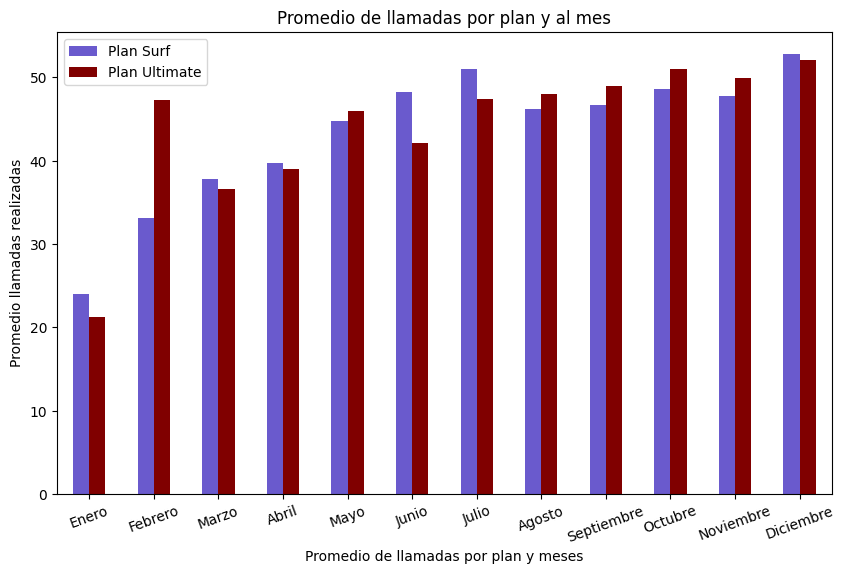

In [39]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# filtro para extraer el promedio del plan surf
calls_surf = df_final[df_final['plan'] == 'surf']
calls_surf_mean = calls_surf.groupby('month')['llamadas_hechas'].mean().round(2)

# filtro para extraer el promedio del plan ultimate
calls_ultimate = df_final[df_final['plan'] =='ultimate']
calls_ultimate_mean = calls_ultimate.groupby('month')['llamadas_hechas'].mean().round(2)

# concatenar 
calls_mean = pd.concat([calls_surf_mean, calls_ultimate_mean], axis=1)
# nombrar columnas acorde a los datos 
calls_mean.columns = ['Plan Surf', 'Plan Ultimate']

# Crear el gráfico
ax = calls_mean.plot(title='Promedio de llamadas por plan y al mes',
                kind='bar', 
                xlabel= 'Promedio de llamadas por plan y meses', 
                ylabel='Promedio llamadas realizadas', 
                color=['slateblue', 'maroon'],
                rot= 20, 
                figsize=[10,6])

# cambiar el numero de los meses por nombre
ax.set_xticks(range(12))
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
# mostrar el grafico
plt.show()


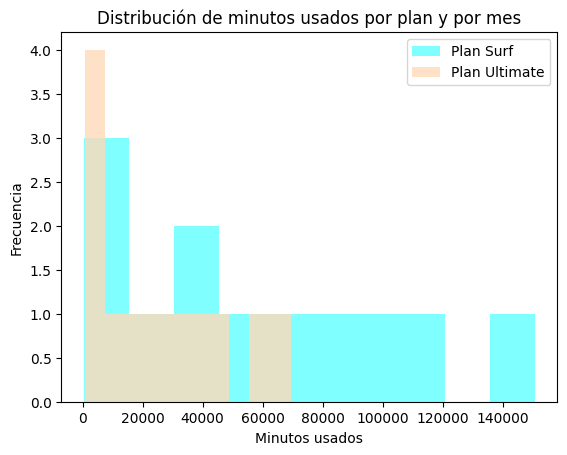

In [40]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# filtro de los clientes del plan surf 
minutes_plan_surf =  df_final[df_final['plan'] == 'surf']
# Agrupar por mes y minutos usados
minutes_surf = minutes_plan_surf.groupby('month')['minutos_usados'].sum()

# filtro de los clientes del plan ultimate 
minutes_plan_ultimate =  df_final[df_final['plan'] == 'ultimate']
# Agrupar por mes y minutos usados
minutes_ultimate = minutes_plan_ultimate.groupby('month')['minutos_usados'].sum()

# Crear un histograma para el plan surf
plt.hist(minutes_surf, bins=10, label='Plan Surf', alpha=0.5, color='aqua')

# Crear histograma para el plan ultimate
plt.hist(minutes_ultimate, bins= 10, label='Plan Ultimate', alpha=0.8, color='peachpuff')

plt.title('Distribución de minutos usados por plan y por mes')
plt.xlabel('Minutos usados')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()


In [41]:
# Calcula la media y la varianza de la duración mensual de llamadas del plan Surf
media_calls_surf = calls_surf['minutos_usados'].mean().round(3)
mediana_calls_surf = calls_surf['minutos_usados'].median()
moda_calls_surf = calls_surf['minutos_usados'].mode()
varianza_calls_surf = calls_surf['minutos_usados'].var().round(3)
std_calls_surf = calls_surf['minutos_usados'].std().round(3)
print('Plan Surf')
print('La media de las llamadas es: ', media_calls_surf)
print('La mediana de las llamadas es: ',mediana_calls_surf)
print('La moda de las llamadas es: ', moda_calls_surf)
print('La varianza de las llamadas es: ', varianza_calls_surf)
print('La desviacion estandar es: ', std_calls_surf)

Plan Surf
La media de las llamadas es:  428.75
La mediana de las llamadas es:  425.0
La moda de las llamadas es:  0    0.0
dtype: float64
La varianza de las llamadas es:  54968.279
La desviacion estandar es:  234.453


In [42]:
# Calcula la media y la varianza de la duración mensual de llamadas del plan Ultimate
media_calls_ultimate = calls_ultimate['minutos_usados'].mean().round(3)
mediana_calls_ultimate = calls_ultimate['minutos_usados'].median()
moda_calls_ultimate = calls_ultimate['minutos_usados'].mode()
varianza_calls_ultimate = calls_ultimate['minutos_usados'].var().round(3)
std_calls_ultimate = calls_ultimate['minutos_usados'].std().round(3)
print('Plan Ultimate')
print('La media de las llamadas es: ', media_calls_ultimate)
print('La mediana de las llamadas es: ',mediana_calls_ultimate)
print('La moda de las llamadas es: ',moda_calls_ultimate)
print('La varianza de las llamadas es: ', varianza_calls_ultimate)
print('La desviacion estandar es: ', std_calls_ultimate)

Plan Ultimate
La media de las llamadas es:  430.45
La mediana de las llamadas es:  424.0
La moda de las llamadas es:  0    0.0
dtype: float64
La varianza de las llamadas es:  57844.465
La desviacion estandar es:  240.509


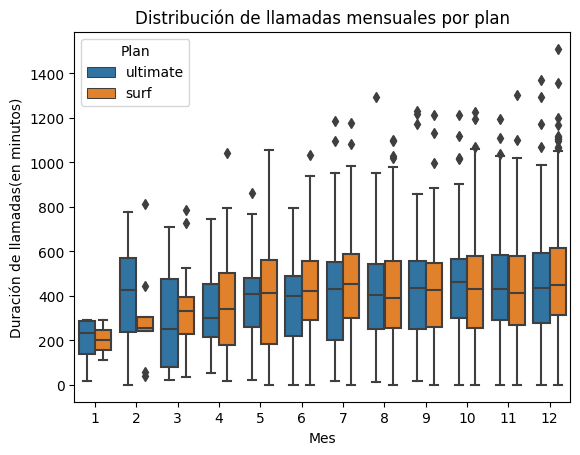

In [43]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# agrupar por usuario, plan y mes, contar el total de minutos usados 
distribucion_calls = df_final.groupby(['user_id','month', 'plan'])['minutos_usados'].sum().reset_index()

# Crear diagrama caja y bigote
sns.boxplot(x='month', y='minutos_usados', hue='plan', data=distribucion_calls)
plt.title('Distribución de llamadas mensuales por plan')
plt.xlabel('Mes')
plt.ylabel('Duración de llamadas(en minutos)')
plt.legend(title='Plan')
plt.show()

De acuerdo a el análisis de los datos de llamadas el comportamiento de los usuarios con respecto a la duración de las llamadas varia acorde al plan que ellos tengan contratado, aunque la diferencia entre sus medias, varianzas y desviaciones estandard no sean tan significativas,por otra parte se observa que las medianas de ambos planes se encuentran muy cercanas a la media, y algo curioso es que la moda en ambos casos es 0, es decir, que ningun numero se repite. También se logra visualizar en el diagrama de caja y bigote que el plan "Surf" cuenta con más valores atípicos en comparación del plan "Ultimate" estos valores también son visibles desde el histograma hecho algunos pasos atrás. Mas adelante se comprobara si el plan ultimate es mas rentable que el plan surf

### Mensajes

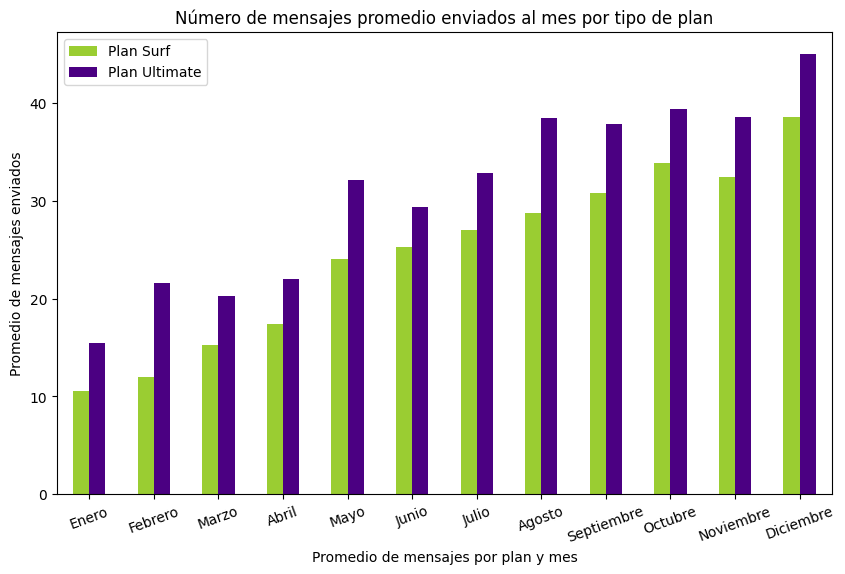

In [44]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# filtro para el plan surf
msj_surf = df_final[df_final['plan'] == 'surf']
# calcular el promedio de mensajes por plan, agrupando por month y mensajes_enviados
msj_surf_mean = msj_surf.groupby('month')['mensajes_enviados'].mean().round(2)

# filtro para el plan ultimate 
msj_ultimate = df_final[df_final['plan'] == 'ultimate']
# calcular el promedio de mensajes por plan, agrupando por month y mensajes_enviados
msj_ultimate_mean = msj_ultimate.groupby('month')['mensajes_enviados'].mean().round(2)

# concatenar 
msj_concat = pd.concat([msj_surf_mean, msj_ultimate_mean], axis=1)
# Renombrar columnas
msj_concat.columns = ['Plan Surf', 'Plan Ultimate']

# Grafica de barrar comparando los mensajes promedios de cada mes de acuerdo al plan 

ax = msj_concat.plot(title='Número de mensajes promedio enviados al mes por tipo de plan', 
                kind='bar',
                figsize= [10,6],
                xlabel='Promedio de mensajes por plan y mes',
                ylabel='Promedio de mensajes enviados', 
                color=['yellowgreen', 'indigo'], 
                rot=20)

# Modificar el nombre de los datos del eje X
ax.set_xticks(range(12))
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

# Mostrar el grafico
plt.show()

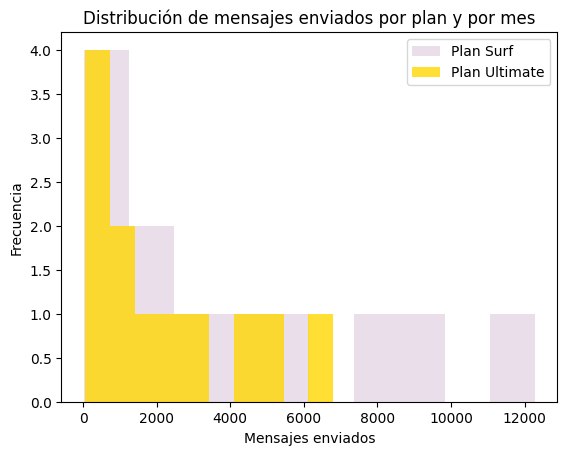

In [45]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# agrupar por mes y por mensajes enviados, despues calcular la suma de los mensajes del plan surf
msj_hist_surf = msj_surf.groupby('month')['mensajes_enviados'].sum()

# agrupar por mes y por mensajes enviados, despues calcular la suma de los mensajes del plan ultimate
msj_hist_ultimate = msj_ultimate.groupby('month')['mensajes_enviados'].sum()

# Crear un histograma para el plan surf
plt.hist(msj_hist_surf, bins=10, label='Plan Surf', alpha=0.5, color='thistle')

# Crear histograma para el plan ultimate
plt.hist(msj_hist_ultimate, bins= 10, label='Plan Ultimate', alpha=0.8, color='gold')

plt.title('Distribución de mensajes enviados por plan y por mes')
plt.xlabel('Mensajes enviados')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()


In [46]:
# Calcula la media y la varianza de los mensajes enviados mensualmente por cada plan 

# Filtro del plan Surf
media_surf_msj = msj_surf['mensajes_enviados'].mean().round(3)
mediana_surf_msj = msj_surf['mensajes_enviados'].median()
moda_surf_msj = msj_surf['mensajes_enviados'].mode()
var_surf_msj = msj_surf['mensajes_enviados'].var().round(3)
std_surf_msj = msj_surf['mensajes_enviados'].std().round(3)
print('Plan Surf')
print('La media de los mensajes es: ', media_surf_msj)
print('La mediana de los mensajes es: ', mediana_surf_msj)
print('La moda de los mensajes es: ', moda_surf_msj)
print('La varianza de los mensajes es: ', var_surf_msj)
print('La desviacion estandard es: ', std_surf_msj)

Plan Surf
La media de los mensajes es:  31.16
La mediana de los mensajes es:  24.0
La moda de los mensajes es:  0    0.0
dtype: float64
La varianza de los mensajes es:  1126.725
La desviacion estandard es:  33.567


In [47]:
# Filtro plan Ultimate
media_ultimate_msj = msj_ultimate['mensajes_enviados'].mean().round(3)
mediana_ultimate_msj = msj_ultimate['mensajes_enviados'].median()
moda_ultimate_msj = msj_ultimate['mensajes_enviados'].mode()
var_ultimate_msj = msj_ultimate['mensajes_enviados'].var().round(3)
std_ultimate_msj = msj_ultimate['mensajes_enviados'].std().round(3)
print('Plan Ultimate')
print('La media de los mensajes es: ', media_ultimate_msj)
print('La mediana de los mensajes es: ', mediana_ultimate_msj)
print('La moda de los mensajes es: ', moda_ultimate_msj)
print('La varianza de los mensajes es: ', var_ultimate_msj)
print('La desviacion estandard es: ', std_ultimate_msj)

Plan Ultimate
La media de los mensajes es:  37.551
La mediana de los mensajes es:  30.0
La moda de los mensajes es:  0    0.0
dtype: float64
La varianza de los mensajes es:  1208.757
La desviacion estandard es:  34.767


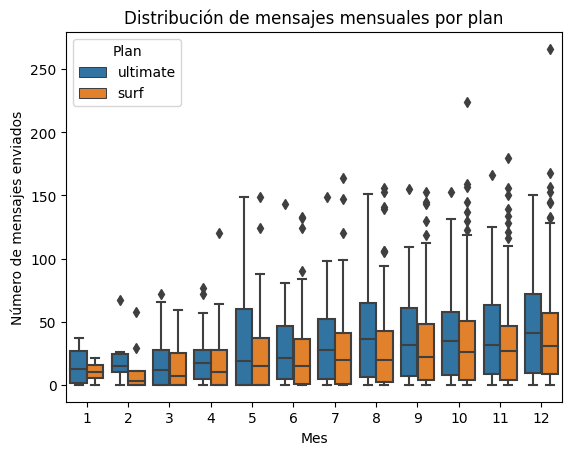

<Figure size 1000x600 with 0 Axes>

In [48]:
# Trazar un diagrama de caja para visualizar la distribución mensual de mensajes enviados

# agrupar por usuario, plan y mes, contar el total de mensajes enviados
msj_caja = df_final.groupby(['user_id', 'plan', 'month'])['mensajes_enviados'].sum().reset_index()

# Crear diagrama de caja y bigote 
sns.boxplot(x='month', y='mensajes_enviados', hue='plan', data= msj_caja)
plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Mes')
plt.ylabel('Número de mensajes enviados')
plt.legend(title='Plan')
plt.figure(figsize=(10,6))

plt.show()

De acuerdo al analisis de los datos de mensajes enviados, se observa que en la mayoria de los meses el plan "ultimate" tiene en promedio un mayor numero de mensajes enviados aparentemente, aunque al calcular sus medidas de dispersion como la media, la varianza y la desviacion estandard en estas no observa una diferencia considerable. Ademas algo curioso es que en la moda no se registra algun numero que se repita dentro de los mensajes enviados, por otra parte la mediana de surf es muy cercana a su media, y mientras en el plan ultimate, su mediana se encuentra mas lejos de su media. Al revisar un histograma de distribución, se observa que los mensajes enviados en el plan 'surf' son mas en cuanto a cantidad y frecuencia. Por ultimo al revisar el diagrama de caja y bigote se observa nuevamente que los mensajes del plan surf tienen un mayor numero de datos atípicos.  

### Internet

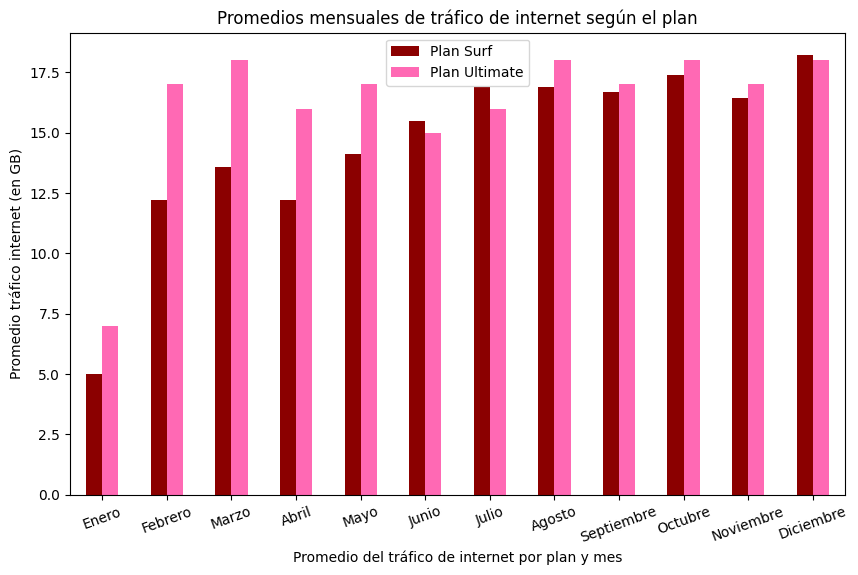

In [49]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# filtro de Surf
internet_surf = df_final[df_final['plan'] == 'surf' ]
# calcular el promedio de internet usado
internet_mean_surf = internet_surf.groupby('month')['gb_usados_round'].mean().round(2)

# Filtro Ultimate 
internet_ultimate = df_final[df_final['plan'] == 'ultimate']
# calcular el promedio de internet usado 
internet_mean_ultimate = internet_ultimate.groupby('month')['gb_usados_round'].mean().round()

# concatenar los planes 
internet_concat = pd.concat([internet_mean_surf,internet_mean_ultimate], axis=1)
# renombrar las columnas 
internet_concat.columns = ['Plan Surf', 'Plan Ultimate']

# Crear grafico de barras para contrastar los promedios mensuales de trafico de internet acorde al plan

ax = internet_concat.plot(title='Promedios mensuales de tráfico de internet según el plan',
                          kind='bar', 
                          xlabel='Promedio del tráfico de internet por plan y mes',
                          ylabel='Promedio tráfico internet (en GB)',
                          color=['darkred', 'hotpink'], 
                          rot = 20,
                          figsize=[10,6])

# Reemplazar numeros por nombre de los meses 
ax.set_xticks(range(12))
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

plt.show()

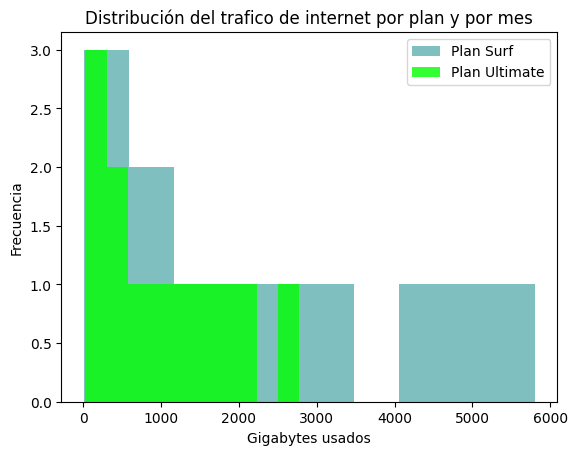

In [50]:
# Crear un histograma donde se contraste el trafico de internet acorde al plan
# Agrupar por mes e internet usado en el plan surf
internet_hist_surf = internet_surf.groupby('month')['gb_usados_round'].sum()

# Agrupar por mes e internet usado en el plan ultimate
internet_hist_ultimate = internet_ultimate.groupby('month')['gb_usados_round'].sum()

# Crear histograma 

# Crear un histograma para el plan surf
plt.hist(internet_hist_surf, bins=10, label='Plan Surf', alpha=0.5, color='teal')

# Crear histograma para el plan ultimate
plt.hist(internet_hist_ultimate, bins= 10, label='Plan Ultimate', alpha=0.8, color='lime')

plt.title('Distribución del trafico de internet por plan y por mes')
plt.xlabel('Gigabytes usados')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()



In [51]:
# Calcular media, varianza del trafico mensual de internet por plan 

# Medidas distribucion del plan Surf 
media_internet_surf = internet_surf['gb_usados_round'].mean().round(3)
median_internet_surf = internet_surf['gb_usados_round'].median()
moda_internet_surf = internet_surf['gb_usados_round'].mode()
var_internet_surf = internet_surf['gb_usados_round'].var().round(3)
std_internet_surf = internet_surf['gb_usados_round'].std().round(3)
print('Plan Surf')
print('La media del trafico es: ', media_internet_surf)
print('La mediana del trafico es: ', median_internet_surf)
print('La moda del trafico es: ', moda_internet_surf)
print('La varianza del tráfico es: ', var_internet_surf)
print('La desviacion estandard es: ', std_internet_surf)

Plan Surf
La media del trafico es:  16.671
La mediana del trafico es:  17.0
La moda del trafico es:  0    18.0
dtype: float64
La varianza del tráfico es:  61.584
La desviacion estandard es:  7.848


In [52]:
# Medidas distribucion del plan Ultimate
media_internet_ultimate = internet_ultimate['gb_usados_round'].mean().round(3)
median_internet_ultimate = internet_ultimate['gb_usados_round'].median()
moda_internet_ultimate = internet_ultimate['gb_usados_round'].mode()
var_internet_ultimate = internet_ultimate['gb_usados_round'].var().round(3)
std_internet_ultimate = internet_ultimate['gb_usados_round'].std().round(3)
print('Plan Ultimate')
print('La media del tráfico es: ', media_internet_ultimate)
print('La mediana del tráfico es: ', median_internet_ultimate)
print('La moda del tráfico es: ', moda_internet_ultimate)
print('La varianza del tráfico es: ', var_internet_ultimate)
print('La desviacion estandard es: ', std_internet_ultimate)

Plan Ultimate
La media del tráfico es:  17.307
La mediana del tráfico es:  17.0
La moda del tráfico es:  0    17.0
dtype: float64
La varianza del tráfico es:  58.831
La desviacion estandard es:  7.67


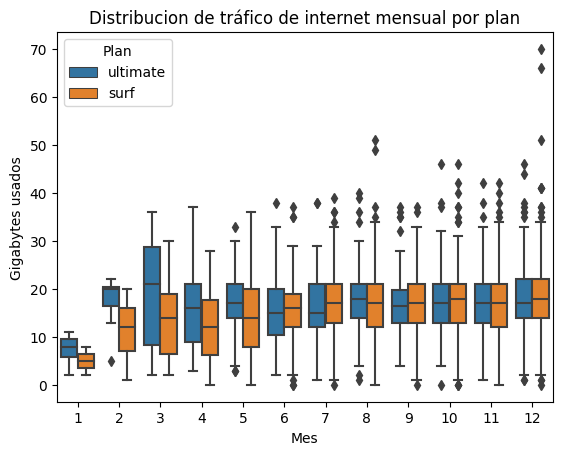

<Figure size 1000x600 with 0 Axes>

In [53]:
# Trazar un diagrama de caja para visualizar la distribución de trafico de internet mensual
# Agrupar por user_id, month y plan 
internet_caja = df_final.groupby(['user_id', 'month', 'plan'])['gb_usados_round'].sum().reset_index()

# Crear diagrama caja y bigote 
sns.boxplot(data=internet_caja, x='month', y='gb_usados_round', hue='plan')
plt.title('Distribucion de tráfico de internet mensual por plan')
plt.xlabel('Mes')
plt.ylabel('Gigabytes usados')
plt.legend(title='Plan')
plt.figure(figsize=(10,6))

plt.show()

En este análisis se comenzo por transformar los datos de trafico de internet de MB a GB para un mejor entendimiento, en la primera grafica se observa un mayor consumo de datos en el plan "Ultimate" aunque hay meses en los que el trafico es similar en ambos planes. En el segundo grafico se observa que el plan "Surf" tuvo una mayor distribución comparado con el otro tipo de plan. Por ultimo el diagrama de caja y bigote nos muestra que el plan "Surf" sige teniendo el mayor numero de valores atípicos, contrastando con el calculo de las medidas de dispersion, se observa que aparentemente sus medias som muy similares al igual que la varianza y la desviación estandard, siguiendo conla observacion de los datos las medianas de ambos planes estan muy cerca de su media, y en el caso del trafico de internet si hay modas, para el caso de surf es de 18 y para ultimate es de 17. 

## Ingreso

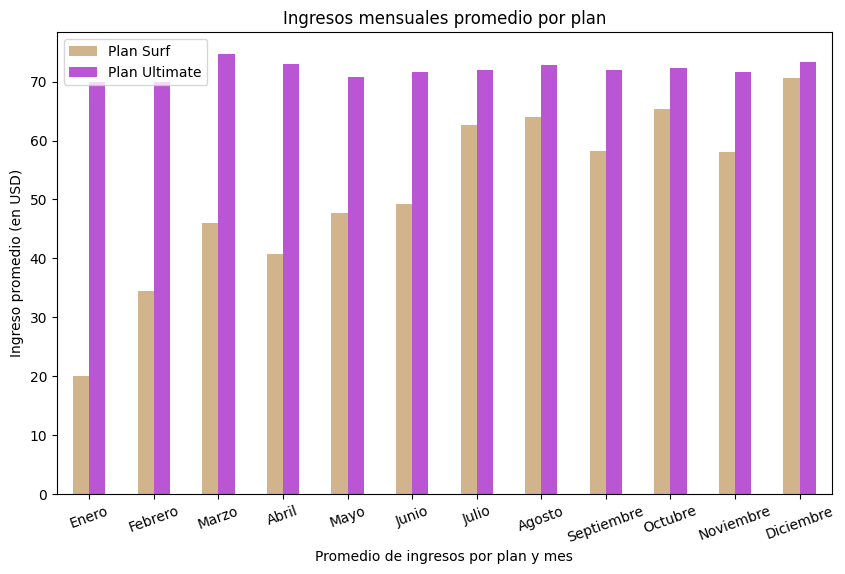

In [54]:
# Comparar el ingreso mensual promedio de los planes
# filtro para plan Surf
ingreso_surf = df_final[df_final['plan'] == 'surf']
# agrupar por month y sacar el promedio del ingreso por cliente
ingreso_mean_surf = ingreso_surf.groupby('month')['ingreso_total_por_cliente'].mean().round(2)

#filtro para plan ultimate 
ingreso_ultimate = df_final[df_final['plan'] == 'ultimate']
# agrupar por month y sacar el promedio del ingreso por cliente
ingreso_mean_ultimate = ingreso_ultimate.groupby('month')['ingreso_total_por_cliente'].mean().round(2)

## concatenar las series
ingreso_concat = pd.concat([ingreso_mean_surf,ingreso_mean_ultimate], axis=1)
# renombrar las columnas de acuerdo al plan 
ingreso_concat.columns = ['Plan Surf', "Plan Ultimate"]

# Crear grafico de barras comparando los ingresos mensuales de cada uno de los planes 
ax = ingreso_concat.plot(title='Ingresos mensuales promedio por plan',
                         kind='bar',
                         xlabel='Promedio de ingresos por plan y mes',
                         ylabel='Ingreso promedio (en USD)',
                         color=['tan', 'mediumorchid'],
                         rot=20, 
                         figsize=[10,6])

# reemplazar nombre de los meses 
ax.set_xticks(range(12))
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.show()

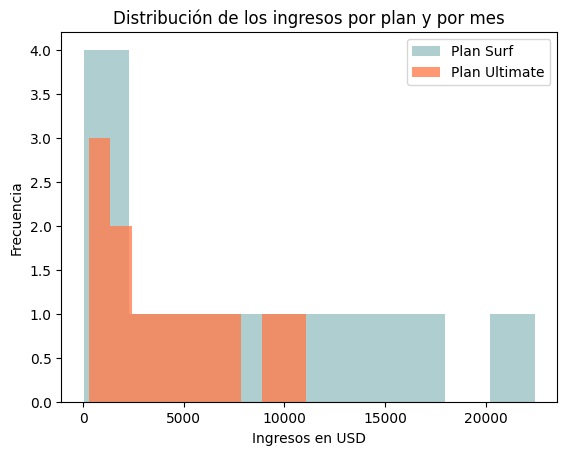

In [55]:
# crear histograma comparando los ingresos mensuales por plan 
# agrupar por month y los ingresos por cliente, calcular los ingresos del plan surf 
ingreso_surf_hist = ingreso_surf.groupby('month')['ingreso_total_por_cliente'].sum()

# agrupar por month y los ingresos por cliente, calcular los ingresos del plan ultimate
ingreso_ultimate_hist = ingreso_ultimate.groupby('month')['ingreso_total_por_cliente'].sum()

# Crear un histograma para el plan surf
plt.hist(ingreso_surf_hist, bins=10, label='Plan Surf', alpha=0.5, color='cadetblue')

# Crear histograma para el plan ultimate
plt.hist(ingreso_ultimate_hist, bins= 10, label='Plan Ultimate', alpha=0.8, color='coral')

plt.title('Distribución de los ingresos por plan y por mes')
plt.xlabel('Ingresos en USD')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()



In [56]:
# Calcular media, varianza de los ingresos mensuales por plan 
# medidas de dispersion del plan Surf
media_ingreso_surf = ingreso_surf['ingreso_total_por_cliente'].mean().round(3)
median_ingreso_surf = ingreso_surf['ingreso_total_por_cliente'].median()
moda_ingreso_surf = ingreso_surf['ingreso_total_por_cliente'].mode()
var_ingreso_surf = ingreso_surf['ingreso_total_por_cliente'].var().round(3)
std_ingreso_surf = ingreso_surf['ingreso_total_por_cliente'].std().round(3)
print('Plan Surf')
print('La media del ingreso es: ', media_ingreso_surf)
print('La mediana del ingreso es: ', median_ingreso_surf)
print('La moda del ingreso es: ', moda_ingreso_surf)
print('La varianza del ingreso es: ', var_ingreso_surf)
print('La desviacion estandard es: ', std_ingreso_surf)

Plan Surf
La media del ingreso es:  60.706
La mediana del ingreso es:  40.36
La moda del ingreso es:  0    20.0
dtype: float64
La varianza del ingreso es:  3067.835
La desviacion estandard es:  55.388


In [57]:
# medidas de dispersion del plan Surf
media_ingreso_ultimate = ingreso_ultimate['ingreso_total_por_cliente'].mean().round(3)
median_ingreso_ultimate = ingreso_ultimate['ingreso_total_por_cliente'].median()
moda_ingreso_ultimate = ingreso_ultimate['ingreso_total_por_cliente'].mode()
var_ingreso_ultimate = ingreso_ultimate['ingreso_total_por_cliente'].var().round(3)
std_ingreso_ultimate = ingreso_ultimate['ingreso_total_por_cliente'].std().round(3)
print('Plan Ultimate')
print('La media del ingreso es: ', media_ingreso_ultimate)
print('La mediana del ingreso es: ', median_ingreso_ultimate)
print('La moda del ingreso es: ', moda_ingreso_ultimate)
print('La varianza del ingreso es: ', var_ingreso_ultimate)
print('La desviacion estandard es: ', std_ingreso_ultimate)

Plan Ultimate
La media del ingreso es:  72.314
La mediana del ingreso es:  70.0
La moda del ingreso es:  0    70.0
dtype: float64
La varianza del ingreso es:  129.848
La desviacion estandard es:  11.395


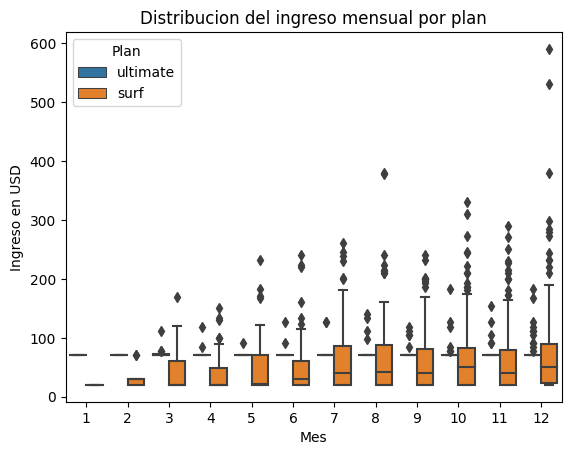

<Figure size 1000x600 with 0 Axes>

In [58]:
# Trazar un diagrama de caja para visualizar la distribución del ingreso mensual
# Agrupar por user_id, month y plan 
ingreso_caja = df_final.groupby(['user_id', 'month', 'plan'])['ingreso_total_por_cliente'].sum().reset_index()

# Crear diagrama caja y bigote 
sns.boxplot(data=ingreso_caja, x='month', y='ingreso_total_por_cliente', hue='plan')
plt.title('Distribucion del ingreso mensual por plan')
plt.xlabel('Mes')
plt.ylabel('Ingreso en USD')
plt.legend(title='Plan')
plt.figure(figsize=(10,6))

plt.show()

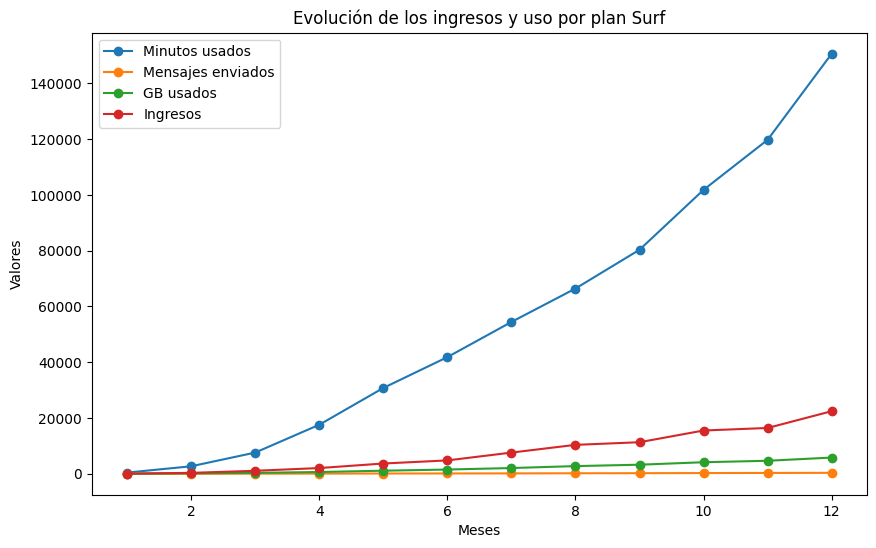

In [59]:
# crear un lineplot por cada plan 
# filtro para el plan surf
filtro_surf = df_final[df_final['plan'] == 'surf']
# agrupar los minutos usados, los mensajes enviados y el trafico de internet del plan surf por los ingresos que obtuvieron para observarlos a traves del tiempo
dicc_surf = { 'minutos_usados' : 'sum', 'mensajes_enviados' : 'size', 'gb_usados_round' : 'sum', 'ingreso_total_por_cliente' : 'sum'}
line_surf = filtro_surf.groupby('month')
line_surf = line_surf.agg(dicc_surf).reset_index().round(2)


# crear grafico de lineas
ax = line_surf.plot(x='month',
                    y=['minutos_usados', 'mensajes_enviados', 'gb_usados_round', 'ingreso_total_por_cliente'],
                    kind='line',
                    marker='o', title='Evolución de los ingresos y uso por plan Surf', 
                    xlabel='Meses', 
                    ylabel='Valores', 
                    figsize=[10,6])

plt.legend(['Minutos usados', 'Mensajes enviados', 'GB usados', 'Ingresos'])
plt.show()

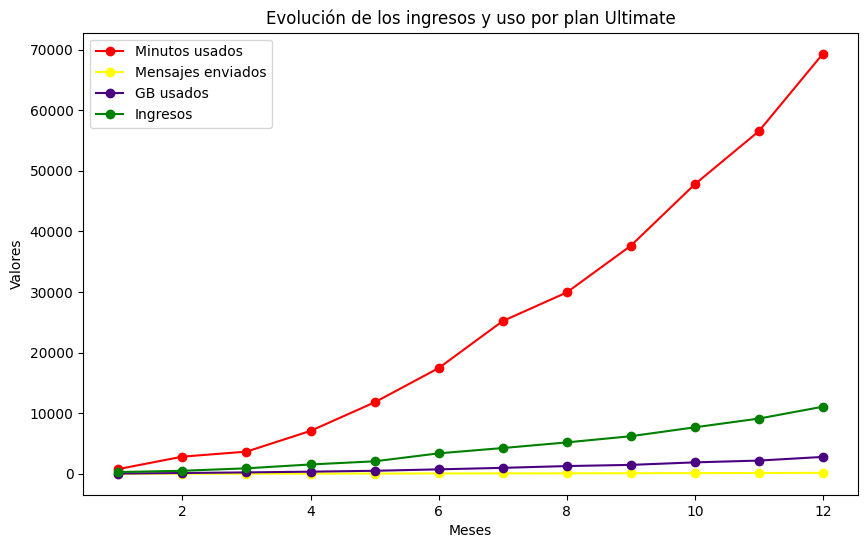

In [60]:
# crear un lineplot por cada plan 
# filtro para el plan surf
filtro_ultimate = df_final[df_final['plan'] == 'ultimate']
# agrupar los minutos usados, los mensajes enviados y el trafico de internet del plan ultimate por los ingresos que obtuvieron para observarlos a traves del tiempo
dicc_ultimate = { 'minutos_usados' : 'sum', 'mensajes_enviados' : 'size', 'gb_usados_round' : 'sum', 'ingreso_total_por_cliente' : 'sum'}
line_ultimate = filtro_ultimate.groupby('month')
line_ultimate = line_ultimate.agg(dicc_ultimate).reset_index().round(2)


# crear grafico de lineas
ax = line_ultimate.plot(x='month',
                    y=['minutos_usados', 'mensajes_enviados', 'gb_usados_round', 'ingreso_total_por_cliente'],
                    marker='o', title='Evolución de los ingresos y uso por plan Ultimate', 
                    xlabel='Meses', 
                    ylabel='Valores', 
                    figsize=[10,6], 
                    color = ['red', 'yellow', 'indigo', 'green'])

plt.legend(['Minutos usados', 'Mensajes enviados', 'GB usados', 'Ingresos'])
plt.show()

En cuanto a la gráfica de barras se puede observar que el promedio de ingresos es superior en el plan "Ultimate", pero al analizar el histograma se aprecia que la frecuencia de la distribucion es mayor en el plan 'Surf' esto se podria explicar con base en el análisis de sus medidas de dispersión, en cuanto a su desviación estandar se observa que es mucho mayor en el plan surf, continuando con el analisis de sus medidas de distribucion en el caso de plan surf la mediana se aleja bastante respecto a su media, caso contrario en el plan ultimate donde su mediana es muy cercana a su media. En ambos casos se observa una moda que difiere en el caso de surf es de 20 y en ultimate es de 70, asimismo analizando el diagrama de caja y bigote se observan muchos valores atipicos en surf, los cuales hacen que su distribucion sea mayor que el plan ultimate. En cuanto al grafico de lineas en ambos planes se observa que el numero de minutos usados crecen exponencialmente mes con mes, los mensajes y el uso de internet su comportamiento se mantiene estable al pasar de los meses. Finalmente el ingreso en ambos planes en ambos casos aumenta al pasar los meses.

## Prueba las hipótesis estadísticas

## Hipotesis nula - NO existen diferencias significativas en las medias de los ingresos promedios de cada uno de los planes

## Hipotesis alternativa - Existen diferencias significativas en las medias de los ingresos promedios de cada uno de los planes

In [61]:
# Prueba las hipótesis

# hacer filtro para el plan surf y por el ingreso total por cliente 
hipo_surf = df_final[df_final['plan'] == 'surf']['ingreso_total_por_cliente']
# hacer filtro para el plan ultimate y por el ingreso total por cliente 
hipo_ultimate = df_final[df_final['plan']== 'ultimate']['ingreso_total_por_cliente']

# establecer el nivel de significancia
alpha = 0.05

# realizar la pruba ttest
diferencia_promedios = st.ttest_ind(hipo_surf, hipo_ultimate)

# extraer el valor p
print('El valor p es:', diferencia_promedios.pvalue)

# comparar el valor p con el nivel de significancia
if diferencia_promedios.pvalue < alpha:
    print("Rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")



El valor p es: 2.862674510698644e-08
Rechazar la hipotesis nula


Para comprobar las hipotesis nula y alternativa fue necesario hacer un filtro de cada uno de los planes por la columna de ingreso_total_por_cliente, despues se establecio el nivel de significancia(alpha) en 0.05, se escogió la prueba t de students para muestras independientes. De esta manera obtuvimos el valor p el cual fue mayor al nivel de significancia por lo cual la hipotesis nula debe ser rechazada, es decir, que existen cambios significativos en las medias de los ingresos de cada uno de los planes. 

# Hipotesis nula - NO existen diferencias significativas en los ingresos promedios de los usuarios del area de NY-NJ en comparacion a los demas

# Hipotesis alternativa - Existen diferencias significativas en los ingresos promedios de los usuarios del area de NY-NJ en comparacion a los demas

In [66]:
df_final['city']

0           Atlanta-Sandy Springs-Roswell, GA MSA
1                 Seattle-Tacoma-Bellevue, WA MSA
2                 Seattle-Tacoma-Bellevue, WA MSA
3                 Seattle-Tacoma-Bellevue, WA MSA
4                 Seattle-Tacoma-Bellevue, WA MSA
                          ...                    
2288    New York-Newark-Jersey City, NY-NJ-PA MSA
2289    New York-Newark-Jersey City, NY-NJ-PA MSA
2290       Los Angeles-Long Beach-Anaheim, CA MSA
2291                       Salt Lake City, UT MSA
2292                        Memphis, TN-MS-AR MSA
Name: city, Length: 2293, dtype: object

In [82]:
# crear matriz externa 

zonas = df_final['city'] == 'NY-NJ'

# zonas que SI son NY-NJ
zonas_si = df_final[zonas]['city']

print(zonas_si)


Series([], Name: city, dtype: object)


In [73]:
# crear matriz externa 
zonas = ['NY-NJ']

# zonas que SI son NY-NJ
zonas_si = df_final[df_final['city'].isin(zonas)]['city']

print(zonas_si)

0        Atlanta-Sandy Springs-Roswell, GA MSA
1              Seattle-Tacoma-Bellevue, WA MSA
2              Seattle-Tacoma-Bellevue, WA MSA
3              Seattle-Tacoma-Bellevue, WA MSA
4              Seattle-Tacoma-Bellevue, WA MSA
                         ...                  
2286        Boston-Cambridge-Newton, MA-NH MSA
2287                 Birmingham-Hoover, AL MSA
2290    Los Angeles-Long Beach-Anaheim, CA MSA
2291                    Salt Lake City, UT MSA
2292                     Memphis, TN-MS-AR MSA
Name: city, Length: 1916, dtype: object


In [77]:
# crear filtro para extraer solo los usuarios de NY-NJ
filtro_ny_zonas = df_final[df_final['city'].str.contains('NY|NJ', regex=True)]

# filtro para usuarios de otras zonas 
filtro_otras_zonas = df_final[~df_final['city'].str.contains('NY|NJ', regex=True)]

print(filtro_ny_zonas['city'])

56            New York-Newark-Jersey City, NY-NJ-PA MSA
57            New York-Newark-Jersey City, NY-NJ-PA MSA
75            New York-Newark-Jersey City, NY-NJ-PA MSA
76            New York-Newark-Jersey City, NY-NJ-PA MSA
77            New York-Newark-Jersey City, NY-NJ-PA MSA
                             ...                       
2260          New York-Newark-Jersey City, NY-NJ-PA MSA
2261          New York-Newark-Jersey City, NY-NJ-PA MSA
2262    Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA
2288          New York-Newark-Jersey City, NY-NJ-PA MSA
2289          New York-Newark-Jersey City, NY-NJ-PA MSA
Name: city, Length: 488, dtype: object


In [62]:
# Prueba las hipótesis

# crear filtro para extraer solo los usuarios de NY-NJ
filtro_ny_zonas = df_final[df_final['city'].str.contains('NY|NJ', regex=True)]

# filtro para usuarios de otras zonas 
filtro_otras_zonas = df_final[~df_final['city'].str.contains('NY|NJ', regex=True)]

# filtro ingreso total por cliente para cada zona 
ingreso_ny_nj = filtro_ny_zonas['ingreso_total_por_cliente']

# filtro ingreso para otras ciudades 
ingreso_otras_cd = filtro_otras_zonas['ingreso_total_por_cliente']

#establecer nivel de significancia
alfa = 0.05

# prueba ttest
resultado = st.ttest_ind(ingreso_ny_nj, ingreso_otras_cd)

# extraer pvalue
print('El valor de p es: ', resultado.pvalue)

# comparar el valor p con el nivel de significancia
if resultado.pvalue < alfa:
    print('Rechazar la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')


El valor de p es:  0.11013307329186486
No podemos rechazar la hipótesis nula


Para comprobar las hipotesis nula y alternativa fue necesario hacer un filtro de las zonas de NY - NJ y otro para filtrar el resto de las zonas, despues se establecio el nivel de significancia(alpha) en 0.05, se escogió la prueba t de students para muestras independientes. De esta manera obtuvimos el valor p el cual fue menor al nivel de significancia por lo cual la hipotesis nula no debe ser rechazada, es decir, que no existen cambios significativos en las medias de los ingresos de los usuarios que viven en la zona NY-NJ a comparacion de los usuarios del resto de las zonas. 

## Conclusión general


1. Comportamiento del usuario por llamadas de acuerdo al plan - En cuanto al comportamiento que se pudo observar en las gráficas es que el promedio de llamadas realizadas por el usuario eran mayores para el plan 'ultimate' asi mismo en el histograma de distribución se observa el mismo comportamiento, aunque en el diagrama de caja y bigote es muy notorio los valores atípicos dentro del plan 'surf'.

2. Comportamiento del usuario por mensajes de acuerdo al plan contratado: En cuanto al promedio de mensajes enviados por los usuarios del plan 'ultimate' se observa una mayor cantidad de estos, en cuanto a sus medidas de distribucion son muy similares, realmente no se alcanza a percibir una gran diferencia, pero nuevamente en el diagrama de caja y bigote se observa una gran cantidad de valores atípicos en el plan 'surf'

3. Comportamiento en el trafico de internet por plan: En cuanto al tráfico de internet hay muchos meses que los usuarios tienden a usar casi el mismo promedio de Gb, solo en 3 meses (de febrero a abril) es donde el plan 'ultimate' tiene un mayor numero de trafico promedio. Aunque al observar el histograma de distribución se observa que realmente quien tiene un mayor numero de trafico es el plan 'surf', aunque al observar sus medidas de distribución como lo es la media, varianza y desviación no se alcanza a ver una gran diferencia entre un plan y el otro. Por ultimo en el diagrama de caja y bigote nuevamente se ven muchos valores atípicos en el plan surf.

4. Ingresos mensuales por plan:  finalmente en los ingresos percibidos por plan nuevamente 'ultimate' es quien se observa en el gráfico de barras que posee un mayor número de ingresos promedio, pero al contrastarlo con un histograma se observa que quen deja un mayor ingreso es el plan 'surf', pero esto se puede deber a la enorme cantidad de valores atípicos dentro de esta muestra. 

Por ultimo al comprobar las hipótesis se llega a la conclusión que realmente existen diferencias significativas en el ingreso percibido por plan, por lo cual se rechaza la hipótesis nula y se acepta la alterna afirmando lo anterior. 

Por otra parte al comparar las medias de clientes ubicados en las zonas de NY - NJ, al comprobar la hipótesis de que si hay diferencias en el ingreso promedio de los usuarios del área NY-NJ al de los usuarios de otras regiones, aplicando una prueba ttest de muestras independientes, se obtuvo un valor p menor al alfa por lo cual no se puede rechazar la hipótesis nula, lo que indica que no existen diferencias significativas entre las zonas de NY - NJ y las demás. 